In [1]:
%load_ext autoreload
%autoreload 2
import sys
from os import path
import os


sys.path.insert(0, "../../")
sys.path.insert(0, "./")

from isanet.neural_network import MLPRegressor
from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
from isanet.model_selection import Kfold, GridSearchCV
from isanet.metrics import mse, mee, accuracy_binary

import numpy as np
import time
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
def plotCup(history, name="."):
    plt.plot(history["loss_mse"])
    plt.plot(history["val_loss_mse"], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("final_model/"+name+"_all.eps")
    plt.show()

def plotCupCut(history, cut= 100, name="."):
    plt.plot(history["loss_mse"][cut:])
    plt.plot(history["val_loss_mse"][cut:], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.xlim(left = cut)
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("final_model/"+name+"_end.eps")
    plt.show()

def plotCupCutUnder(history, cut= 100, name="."):
    plt.plot(history["loss_mse"][:cut])
    plt.plot(history["val_loss_mse"][:cut], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("final_model/"+name+"_start.eps")
    plt.show()

# load dataset

In [3]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_tr_vl_10.csv',delimiter=',')
print("Dim dataset train+val: {}".format(dataset.shape))
X_train = dataset[:1350,:-2] # 90%
Y_train = dataset[:1350,-2:]
    
X_val = dataset[1350:,:-2]   # 10%
Y_val = dataset[1350:,-2:]

print("Dim train set: {}".format(X_train.shape))
print("Dim val set: {}".format(X_val.shape))

Dim dataset train+val: (1500, 12)
Dim train set: (1350, 10)
Dim val set: (150, 10)


# eseguo 10 run

------------------------
        Run 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


17.18904209136963 seconds
MSE train: 0.7407464161948791 
MSE val: 0.8699419832071802 


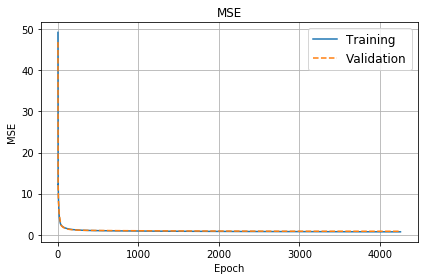

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


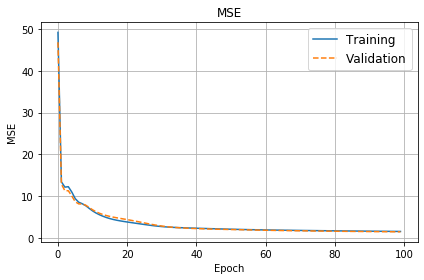

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


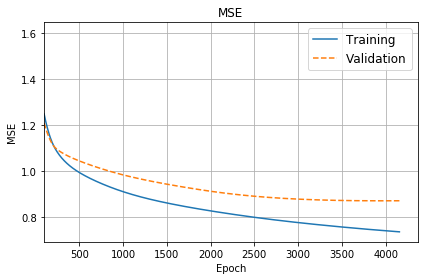

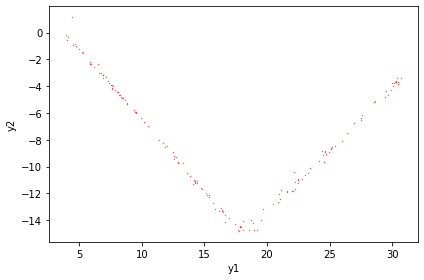

------------------------
        Run 1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


17.73330283164978 seconds
MSE train: 0.7198466207915705 
MSE val: 0.9158233658280847 


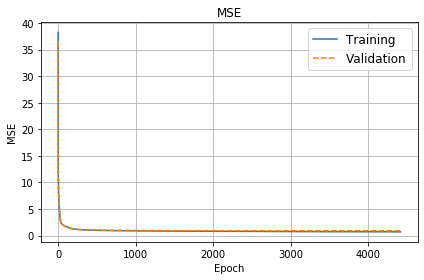

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


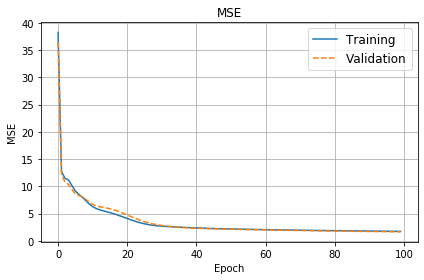

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


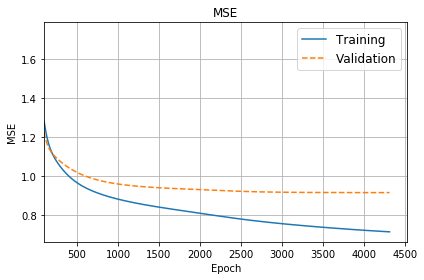

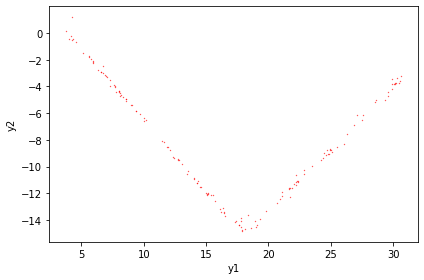

------------------------
        Run 2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


23.05132484436035 seconds
MSE train: 0.716380445454031 
MSE val: 0.8808022047958218 


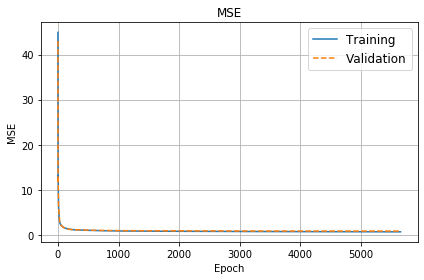

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


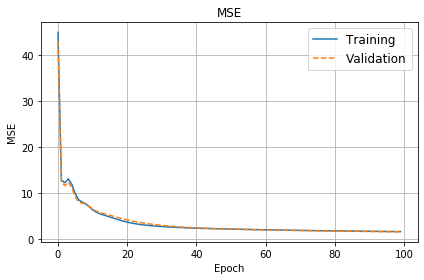

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


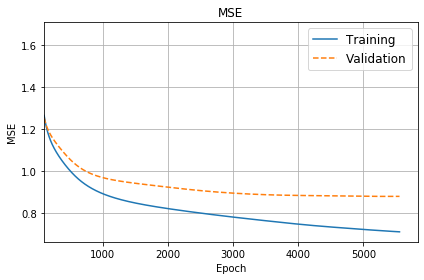

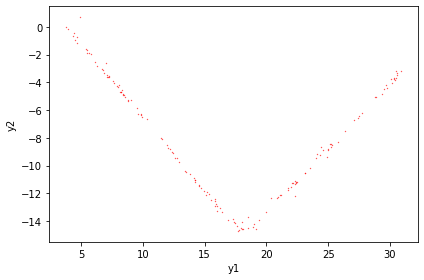

------------------------
        Run 3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


28.15620231628418 seconds
MSE train: 0.7557106507815262 
MSE val: 0.9325339471271119 


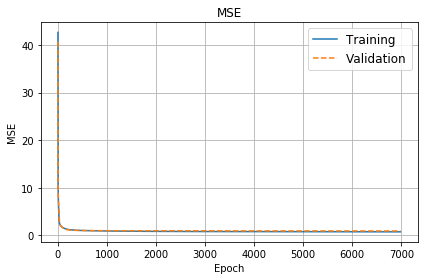

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


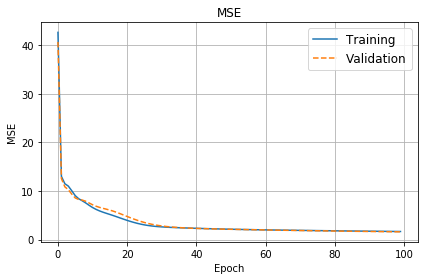

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


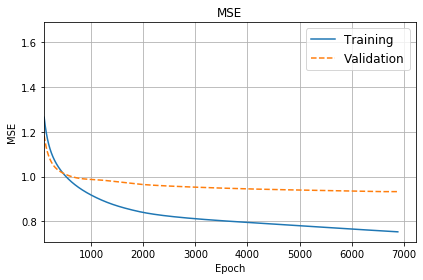

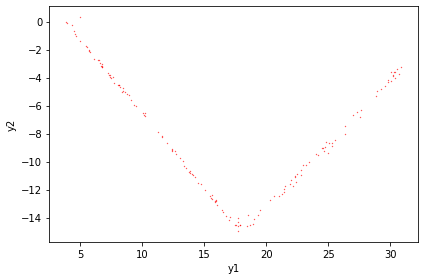

------------------------
        Run 4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


11.201492071151733 seconds
MSE train: 0.7576980970996526 
MSE val: 0.8744767599885078 


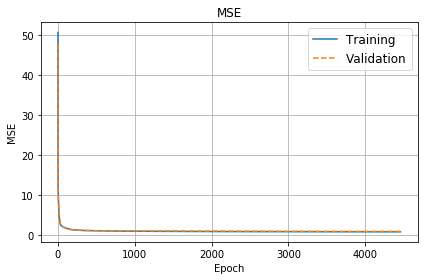

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


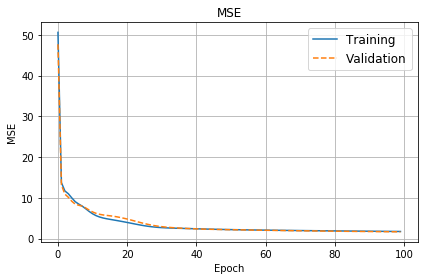

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


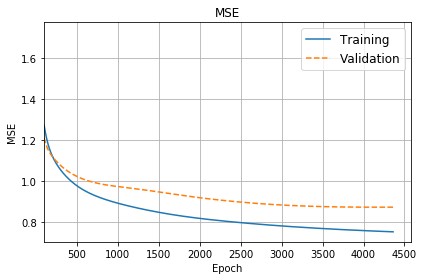

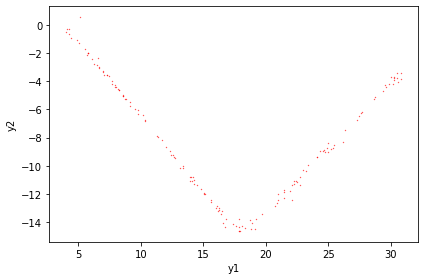

------------------------
        Run 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


25.022198915481567 seconds
MSE train: 0.6818500872453478 
MSE val: 0.8511188576739916 


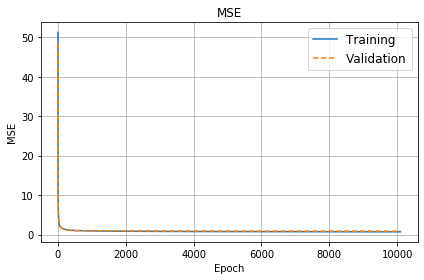

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


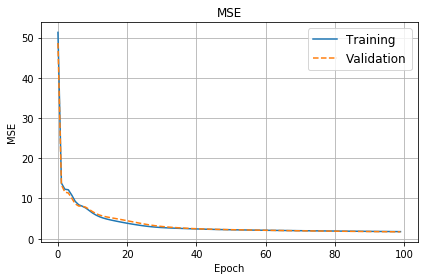

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


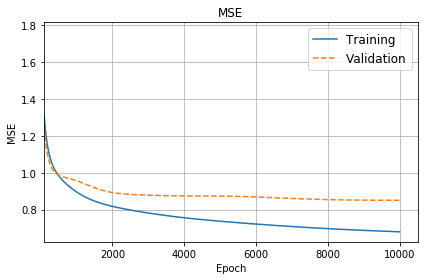

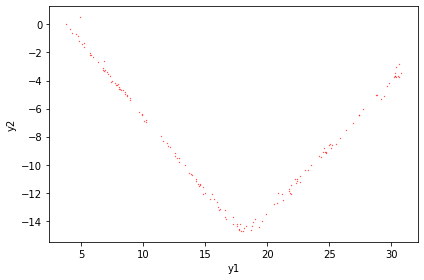

------------------------
        Run 6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


33.934985399246216 seconds
MSE train: 0.676108107624353 
MSE val: 0.8804412667669703 


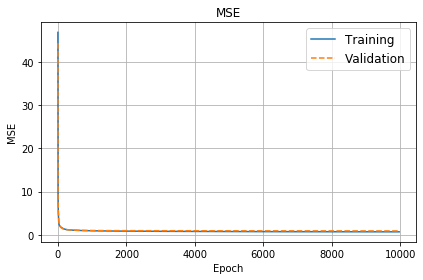

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


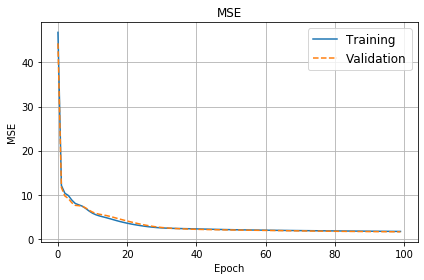

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


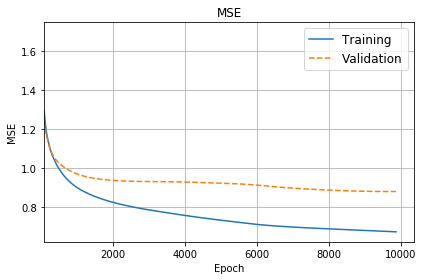

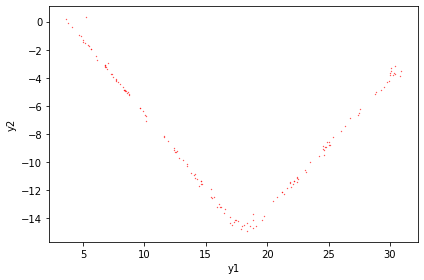

------------------------
        Run 7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


54.640886068344116 seconds
MSE train: 0.6195047916251012 
MSE val: 0.8186129549100272 


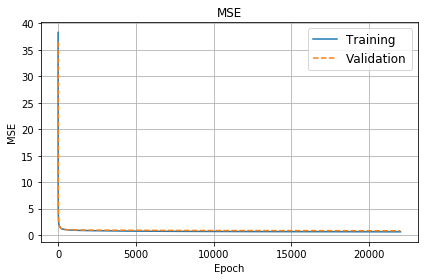

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


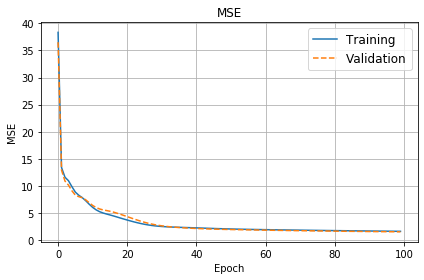

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


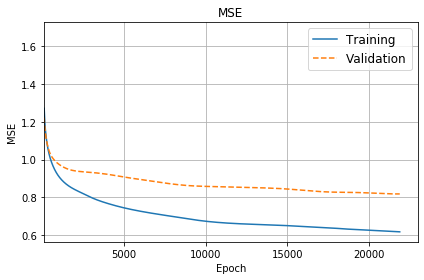

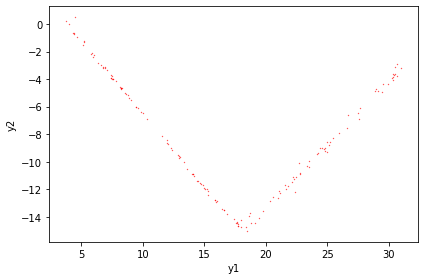

------------------------
        Run 8


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


43.68410873413086 seconds
MSE train: 0.6950313306515434 
MSE val: 0.8801036716801163 


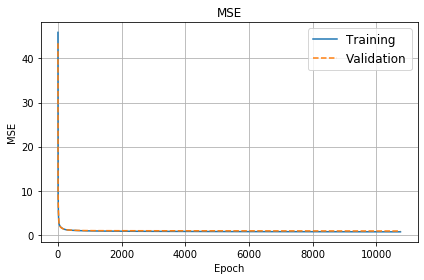

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


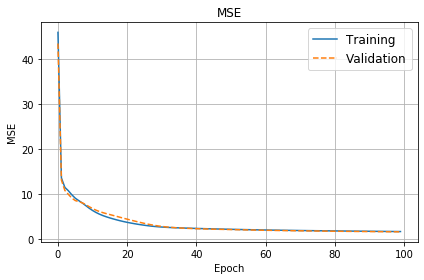

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


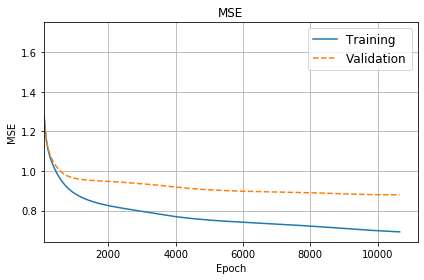

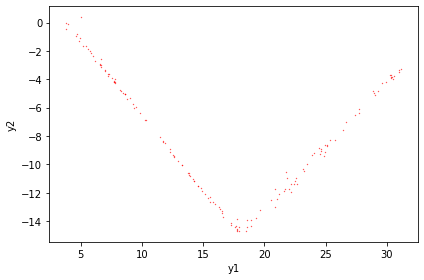

------------------------
        Run 9


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


76.9411461353302 seconds
MSE train: 0.6532997783076484 
MSE val: 0.8588661845920584 


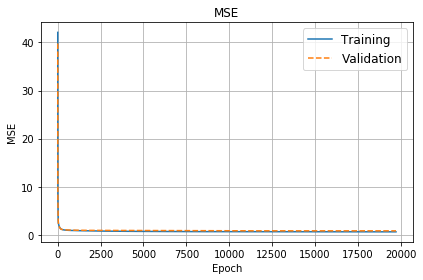

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


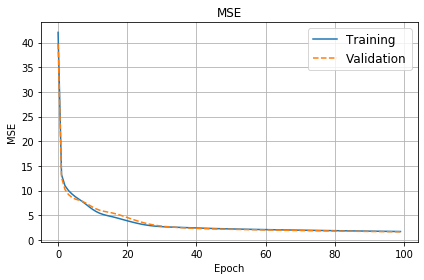

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


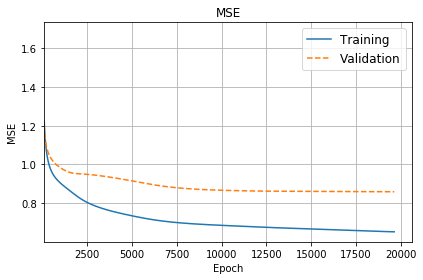

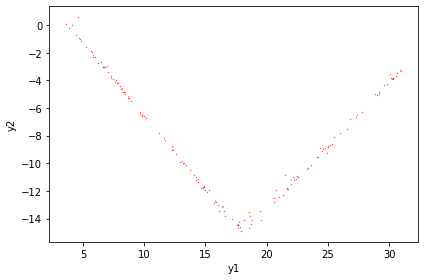

In [4]:
models = []
for i in range(0,10):
    print("------------------------")
    print("        Run {0}".format(i))
    param = {'n_layer_units': [50], 
             'learning_rate': 0.058, 
             'max_epoch': 30000, 
             'momentum': 0.9, 
             'nesterov': True, 
             'kernel_regularizer': 0.0005, 
             'activation': 'sigmoid', 
             'early_stop': EarlyStopping(0.009, 200)}

    model = MLPRegressor(X_train.shape[1], Y_train.shape[1], verbose = 0, **param)
    
    start_time = time.time()
    model.fit(X_train, Y_train, X_val, Y_val)
    print("%s seconds" % (time.time() - start_time))

    outputNet = model.predict(X_train)
    printMSE(outputNet, Y_train, type = "train")

    outputNet = model.predict(X_val)
    printMSE(outputNet, Y_val, type = "val")

    plotCup(model.get_history(), name="model_{0}".format(i))
    plotCupCutUnder(model.get_history(), name="model_{0}".format(i))
    plotCupCut(model.get_history(), name="model_{0}".format(i))

    plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
    plt.ylabel('y2')
    plt.xlabel('y1')
    plt.tight_layout()
    plt.show()
    models.append(model)

In [11]:
len(models[7].get_history()["val_loss_mse"])

22005

In [5]:
save_data(models[7],"final_model/best_2_model_7.h5")

In [8]:
print("Training:")
outputNet = models[7].predict(X_train)
print("MSE train: {}".format(mse(outputNet,Y_train)))
print("MEE train: {}".format(mee(outputNet,Y_train)))
outputNet = models[7].predict(X_val)
print("Validation:")
print("MSE Val: {}".format(mse(outputNet,Y_val)))
print("MEE Val: {}".format(mee(outputNet,Y_val)))

Training:
MSE train: 0.6195047916251012
MEE train: 0.8564803653638859
Validation:
MSE Val: 0.8186129549100272
MEE Val: 0.9602154646577659


# Internal Test Set

MSE TEST: 0.8625655873749536
MEE TEST: 0.9939726986917442


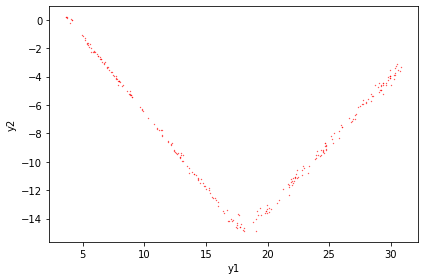

In [12]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_test_10.csv',delimiter=',')
X_test = dataset[:,:-2]
Y_test = dataset[:,-2:]
outputNet = models[7].predict(X_test)
print("MSE TEST: {}".format(mse(outputNet,Y_test)))
print("MEE TEST: {}".format(mee(outputNet,Y_test)))
plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

# Cup micheli test

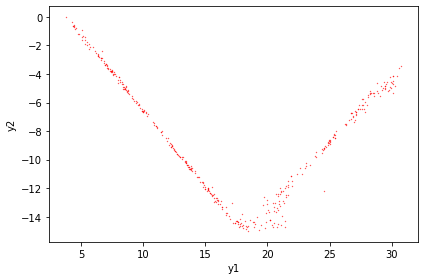

In [13]:
dataset = np.genfromtxt('../dataset/ML-CUP19-TS.csv',delimiter=',')
ten_features = [1, 2, 3, 4, 5, 6, 7, 8, 12, 15]
X_test = dataset[:,ten_features]
outputNet = models[7].predict(X_test)

plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

# final retrainig for the cup

In [19]:
dataset = np.genfromtxt('../dataset/ML-CUP19-TR.csv',delimiter=',')
np.random.shuffle(dataset)
ten_features = [1, 2, 3, 4, 5, 6, 7, 8, 12, 15, 21, 22]
dataset = dataset[:,ten_features]
print("Dim dataset train+val: {}".format(dataset.shape))
X_train = dataset[:1588,:-2] # 90%
Y_train = dataset[:1588,-2:]
    
X_val = dataset[1588:,:-2]   # 10%
Y_val = dataset[1588:,-2:]

print("Dim train set: {}".format(X_train.shape))
print("Dim val set: {}".format(X_val.shape))

Dim dataset train+val: (1765, 12)
Dim train set: (1588, 10)
Dim val set: (177, 10)


------------------------
        Run 0
68.87314891815186 seconds
Training:
MSE train: 0.6842017361007621
MEE train: 0.8831299044998276
Validation:
MSE Val: 0.8306943854908588
MEE Val: 1.0162429199993066


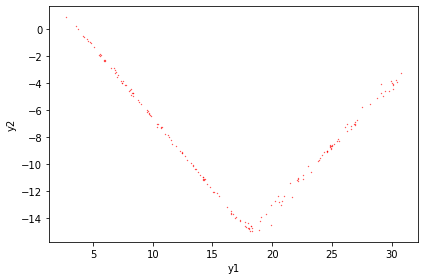

------------------------
        Run 1
16.085886001586914 seconds
Training:
MSE train: 0.8102080708503225
MEE train: 0.9734000324846346
Validation:
MSE Val: 0.849043601131057
MEE Val: 1.045963490921722


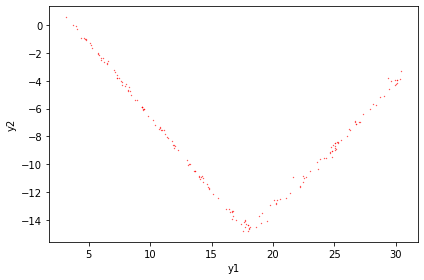

------------------------
        Run 2
70.04749298095703 seconds
Training:
MSE train: 0.7206593989991831
MEE train: 0.9110703452578934
Validation:
MSE Val: 0.8233624213225058
MEE Val: 1.0172928804902757


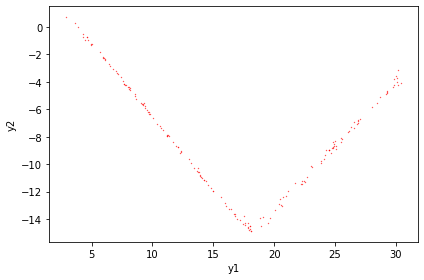

------------------------
        Run 3
61.312578201293945 seconds
Training:
MSE train: 0.7216908960860974
MEE train: 0.915890806603766
Validation:
MSE Val: 0.7950997544314323
MEE Val: 1.0197478662787387


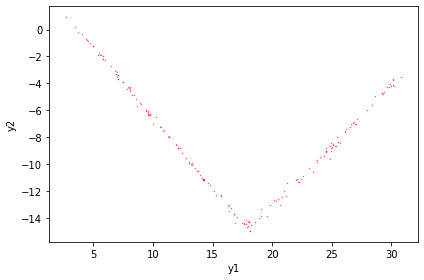

------------------------
        Run 4
30.397361993789673 seconds
Training:
MSE train: 0.7490379086163067
MEE train: 0.9340357886509315
Validation:
MSE Val: 0.8441013703881158
MEE Val: 1.0310792760982899


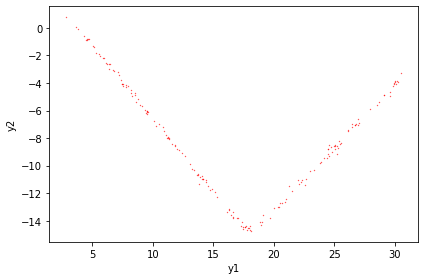

------------------------
        Run 5
18.556228160858154 seconds
Training:
MSE train: 0.779536809824451
MEE train: 0.9566453185142462
Validation:
MSE Val: 0.8483757840019494
MEE Val: 1.0387174774734536


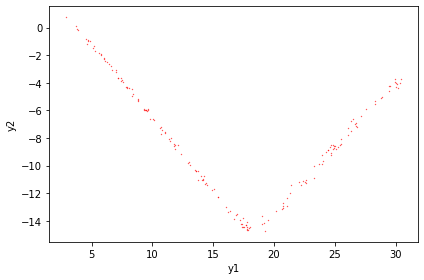

------------------------
        Run 6
27.605450868606567 seconds
Training:
MSE train: 0.7733275413099819
MEE train: 0.9433766448781744
Validation:
MSE Val: 0.8283865670703705
MEE Val: 1.0426357952521246


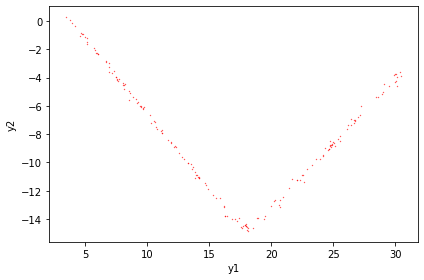

------------------------
        Run 7
12.127541065216064 seconds
Training:
MSE train: 0.822714314439819
MEE train: 0.9780755016246262
Validation:
MSE Val: 0.8697378523488681
MEE Val: 1.06473711210013


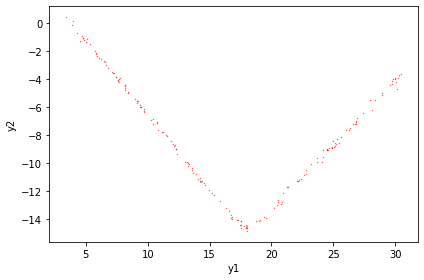

------------------------
        Run 8
35.86653518676758 seconds
Training:
MSE train: 0.756819520991343
MEE train: 0.9313308310081735
Validation:
MSE Val: 0.8180843409000453
MEE Val: 1.011206238286217


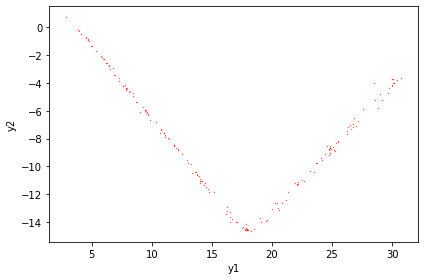

------------------------
        Run 9
32.41970419883728 seconds
Training:
MSE train: 0.7507973832280873
MEE train: 0.9337472066783364
Validation:
MSE Val: 0.8286562295586544
MEE Val: 1.035575112202359


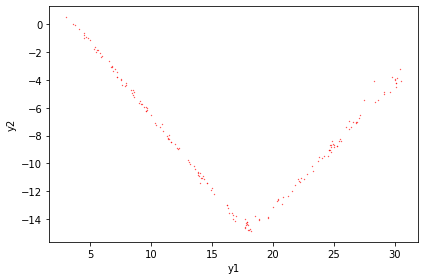

In [20]:
cup_models = []
for i in range(0,10):
    print("------------------------")
    print("        Run {0}".format(i))
    param = {'n_layer_units': [50], 
             'learning_rate': 0.058, 
             'max_epoch': 30000, 
             'momentum': 0.9, 
             'nesterov': True, 
             'kernel_regularizer': 0.0005, 
             'activation': 'sigmoid', 
             'early_stop': EarlyStopping(0.009, 200)}

    model = MLPRegressor(X_train.shape[1], Y_train.shape[1], verbose = 0, **param)
    
    start_time = time.time()
    model.fit(X_train, Y_train, X_val, Y_val)
    print("%s seconds" % (time.time() - start_time))
    print("Training:")
    outputNet = model.predict(X_train)
    print("MSE train: {}".format(mse(outputNet,Y_train)))
    print("MEE train: {}".format(mee(outputNet,Y_train)))
    outputNet = model.predict(X_val)
    print("Validation:")
    print("MSE Val: {}".format(mse(outputNet,Y_val)))
    print("MEE Val: {}".format(mee(outputNet,Y_val)))
    #plotCup(model.get_history(), name="model_{0}".format(i))
    #plotCupCutUnder(model.get_history(), name="model_{0}".format(i))
    #plotCupCut(model.get_history(), name="model_{0}".format(i))

    plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
    plt.ylabel('y2')
    plt.xlabel('y1')
    plt.tight_layout()
    plt.show()
    cup_models.append(model)

In [26]:
cup_models[3]
save_data(cup_models[3],"../cup_blind_result/final_model.h5")

In [43]:
print("Training:")
outputNet = cup_models[3].predict(X_train)
print("MSE train: {}".format(mse(outputNet,Y_train)))
print("MEE train: {}".format(mee(outputNet,Y_train)))
outputNet = cup_models[3].predict(X_val)
print("Validation:")
print("MSE Val: {}".format(mse(outputNet,Y_val)))
print("MEE Val: {}".format(mee(outputNet,Y_val)))

Training:
MSE train: 0.7216908960860974
MEE train: 0.915890806603766
Validation:
MSE Val: 0.7950997544314323
MEE Val: 1.0197478662787387


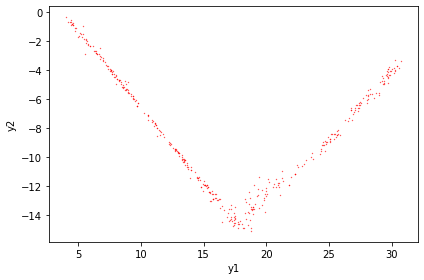

In [44]:
dataset = np.genfromtxt('../dataset/ML-CUP19-TS.csv',delimiter=',')
ten_features = [1, 2, 3, 4, 5, 6, 7, 8, 12, 15]
X_test = dataset[:,ten_features]
outputNet = cup_models[3].predict(X_test)

plt.plot(outputNet[:,-2], outputNet[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()

In [38]:
print(outputNet[[1,2,3,-1],:])

[[ 11.18376907  -7.74932262]
 [ 17.7962226  -14.63191714]
 [ 16.05648968 -12.94326193]
 [  6.96733613  -3.16616984]]


In [41]:
cup_result = pd.DataFrame(outputNet)
cup_result.index += 1 
cup_result.to_csv('../cup_blind_result/isanet_ML-CUP19-TS.csv', index=True)
#np.savetxt("../cup_blind_result/isanet_ML-CUP19-TS.csv", outputNet)

In [45]:
cup_output = np.genfromtxt('../cup_blind_result/isanet_ML-CUP19-TS.csv',delimiter=',')
cup_output = cup_output[:,1:]
np.linalg.norm(outputNet - cup_output)


0.0

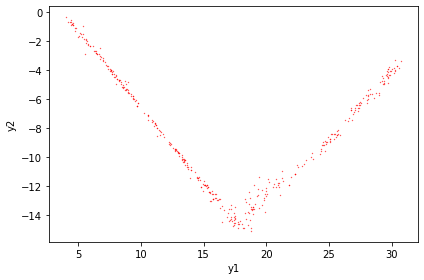

In [46]:
cup_output = np.genfromtxt('../cup_blind_result/isanet_ML-CUP19-TS.csv',delimiter=',')

plt.plot(cup_output[:,-2], cup_output[:,-1], 'ro', markersize=0.3)
plt.ylabel('y2')
plt.xlabel('y1')
plt.tight_layout()
plt.show()